In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 55% 90.0M/163M [00:00<00:00, 940MB/s]
100% 163M/163M [00:00<00:00, 797MB/s] 


In [4]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is successfully extracted')

The dataset is successfully extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


## Importing the Dependencies

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
from PIL import Image

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3404.jpg', 'with_mask_2992.jpg', 'with_mask_3074.jpg', 'with_mask_2918.jpg', 'with_mask_2075.jpg']
['with_mask_2474.jpg', 'with_mask_389.jpg', 'with_mask_2370.jpg', 'with_mask_1959.jpg', 'with_mask_1375.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3665.jpg', 'without_mask_1062.jpg', 'without_mask_3019.jpg', 'without_mask_3258.jpg', 'without_mask_3054.jpg']
['without_mask_2485.jpg', 'without_mask_2980.jpg', 'without_mask_2840.jpg', 'without_mask_2860.jpg', 'without_mask_250.jpg']


In [9]:
print('number of with mask photos: ', len(with_mask_files))
print('number of without mask photos: ', len(without_mask_files))

number of with mask photos:  3725
number of without mask photos:  3828


## Creating Labels for the two classes of Images

In [10]:
# create the labels
with_mask_labels = [1]*len(with_mask_files)
without_mask_labels = [0]*len(without_mask_files)

In [11]:
labels = with_mask_labels + without_mask_labels

## Display the images

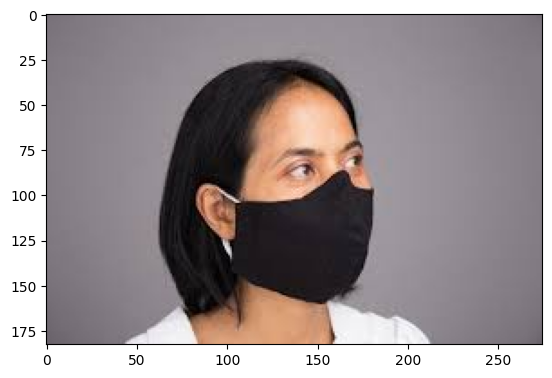

In [12]:
# displaying with mask
img = mpimg.imread('/content/data/with_mask/with_mask_2223.jpg')
imgplot = plt.imshow(img)
plt.show()

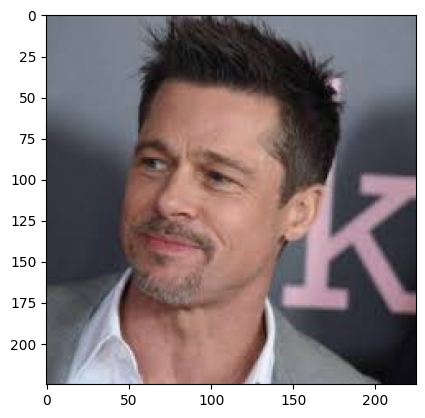

In [13]:
# displaying without mask
img = mpimg.imread('/content/data/without_mask/without_mask_2595.jpg')
imgplot = plt.imshow(img)
plt.show()

## Image Processing

 - Resize the images
 - Convert the images to numpy array

In [14]:
# Convert the with mask image to numpy array
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB') # Prevent the mix of grayscale and RGB
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB') # Prevent the mix of grayscale and RGB
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [15]:
print(len(data))
print(type(data))

7553
<class 'list'>


array([[[231, 222, 207],
        [236, 227, 212],
        [236, 227, 211],
        ...,
        [ 50,  51,  55],
        [ 47,  53,  55],
        [ 48,  50,  56]],

       [[233, 224, 211],
        [229, 219, 206],
        [239, 229, 217],
        ...,
        [ 50,  52,  56],
        [ 49,  54,  58],
        [ 49,  52,  58]],

       [[238, 228, 217],
        [234, 224, 214],
        [240, 229, 221],
        ...,
        [ 50,  55,  58],
        [ 50,  56,  61],
        [ 50,  53,  62]],

       ...,

       [[101, 106, 101],
        [110, 122, 122],
        [111, 122, 120],
        ...,
        [133, 139, 135],
        [116, 121, 116],
        [110, 113, 106]],

       [[ 57,  47,  38],
        [ 85,  84,  81],
        [107, 112, 106],
        ...,
        [134, 139, 135],
        [117, 122, 117],
        [110, 114, 106]],

       [[ 47,  30,  21],
        [ 47,  33,  26],
        [ 60,  54,  47],
        ...,
        [134, 139, 135],
        [118, 124, 118],
        [110, 114, 106]]], dtype=uint8)
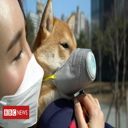

In [16]:
data[0]

In [17]:
print(data[0].shape)
print(type(data[0]))

(128, 128, 3)
<class 'numpy.ndarray'>


In [18]:
# Converting image list and lable list to numpy arrays for easier processing

X = np.array(data)
Y = np.array(labels)

print(type(X))
print(type(Y))
print(X.shape)
print(Y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(7553, 128, 128, 3)
(7553,)


## Train Test Split

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [20]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [21]:
# Scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [22]:
X_train_scaled[0]

array([[[0.05882353, 0.08235294, 0.1372549 ],
        [0.05882353, 0.08235294, 0.1372549 ],
        [0.05490196, 0.07843137, 0.13333333],
        ...,
        [0.02745098, 0.05098039, 0.11372549],
        [0.03921569, 0.0627451 , 0.1254902 ],
        [0.04705882, 0.07058824, 0.13333333]],

       [[0.05882353, 0.08235294, 0.1372549 ],
        [0.05882353, 0.08235294, 0.1372549 ],
        [0.05490196, 0.07843137, 0.13333333],
        ...,
        [0.04313725, 0.06666667, 0.12941176],
        [0.05098039, 0.0745098 , 0.1372549 ],
        [0.05098039, 0.0745098 , 0.1372549 ]],

       [[0.05882353, 0.08235294, 0.1372549 ],
        [0.05882353, 0.08235294, 0.1372549 ],
        [0.05490196, 0.07843137, 0.13333333],
        ...,
        [0.05098039, 0.0745098 , 0.1372549 ],
        [0.05490196, 0.07843137, 0.14117647],
        [0.05490196, 0.07843137, 0.14117647]],

       ...,

       [[0.03529412, 0.04705882, 0.10588235],
        [0.03529412, 0.04705882, 0.10588235],
        [0.03921569, 0

## Building a Convolutional Neural Network

In [23]:
import tensorflow as tf
from tensorflow import keras


In [24]:
num_of_classes = 2
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation = 'sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['acc']
)

In [26]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - acc: 0.6600 - loss: 0.6825 - val_acc: 0.8496 - val_loss: 0.3160
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - acc: 0.8754 - loss: 0.3036 - val_acc: 0.8810 - val_loss: 0.2847
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.8900 - loss: 0.2659 - val_acc: 0.8909 - val_loss: 0.2521
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9267 - loss: 0.1903 - val_acc: 0.9041 - val_loss: 0.2742
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9269 - loss: 0.1738 - val_acc: 0.9025 - val_loss: 0.2526
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - acc: 0.9421 - loss: 0.1481 - val_acc: 0.9091 - val_loss: 0.2621
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - acc: 0.9472 - loss: 0.1347 - val_acc: 0.9256 - val_loss: 0.2477
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - acc: 0.9510 - loss: 0.1188 - val_acc: 0.9174 - val_loss: 0.2560
Epoch 9/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17m

In [26]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

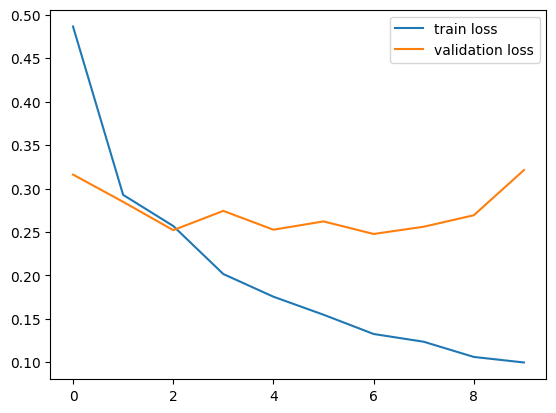

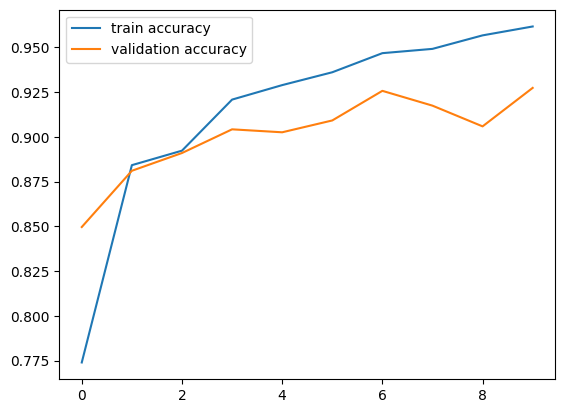

In [28]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

# Build a predictive system

Enter the path of the input image: /content/test_face_mask.jpg


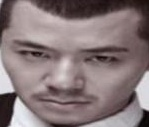

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0.5040926 0.4550565]]
0
The person in the image is not wearing a mask


In [30]:
# Predictive System

input_image_path = input('Enter the path of the input image: ')
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')